# ADS 509 Assignment 2.1: Tokenization, Normalization, Descriptive Statistics 

This notebook holds Assignment 2.1 for Module 2 in ADS 509, Applied Text Mining. Work through this notebook, writing code and answering questions where required. 

In the previous assignment you put together Twitter data and lyrics data on two artists. In this assignment we explore some of the textual features of those data sets. If, for some reason, you did not complete that previous assignment, data to use for this assignment can be found in the assignment materials section of Blackboard. 

This assignment asks you to write a short function to calculate some descriptive statistics on a piece of text. Then you are asked to find some interesting and unique statistics on your corpora. 


## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 


In [17]:
import os
import re
import emoji
import pandas as pd
import numpy as np

from collections import Counter, defaultdict
from nltk.corpus import stopwords
from string import punctuation

stopwords = stopwords.words("english")

In [18]:
# Add any additional import statements you need here
#import tweepy\n",
import os
import datetime
import re
from pprint import pprint

# for the lyrics scrape section\n",
import requests
import time
from bs4 import BeautifulSoup
from collections import defaultdict, Counter
   
# Use this cell for any import statements you add\n",
import json
import pandas as pd
import numpy as np
from random import * 
    
import nltk
from nltk.stem import WordNetLemmatizer
import glob
import string

In [19]:
# change `data_location` to the location of the folder on your machine.
data_location = '/Users/ryan_s_dunn/opt/anaconda3/lib/python3.8/posixpath.py'

# These subfolders should still work if you correctly stored the 
# data from the Module 1 assignment
twitter_folder = "twitter/"
lyrics_folder = "lyrics/"

In [20]:
def descriptive_stats(tokens, num_tokens = 5, verbose=True) :
    """
        Given a list of tokens, print number of tokens, number of unique tokens, 
        number of characters, lexical diversity (https://en.wikipedia.org/wiki/Lexical_diversity), 
        and num_tokens most common tokens. Return a list with the number of tokens, number
        of unique tokens, lexical diversity, and number of characters. 
    
    """

    # Fill in the correct values here. 
    num_tokens = 0
    num_unique_tokens = 0
    lexical_diversity = 0.0
    num_characters = 0
    
    if verbose :        
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")
    
        # print the five most common tokens
        
    return([num_tokens, num_unique_tokens,
            lexical_diversity,
            num_characters])
    

In [416]:
lemmatizer = WordNetLemmatizer()
punctuation = set(punctuation)

def descriptive_stats(tokens, num_tokens = 5, verbose=True):
    """
        Given a list of tokens, print number of tokens, number of unique tokens, 
        number of characters, lexical diversity (https://en.wikipedia.org/wiki/Lexical_diversity), 
        and num_tokens most common tokens. Return a list with the number of tokens, number
        of unique tokens, lexical diversity, and number of characters. 
    
    """
    #lists and counters for iterating though the list of words \n",
    total_type_list = []
    full_token_list = []
    lemmas = []
    num_tokens = 0
    num_unique_tokens = 0
    lexical_diversity = 0.0
    num_characters = 0

    #create the total tokens variable for all words passed into the function
    all_tokens = nltk.tokenize.word_tokenize(tokens)
    
 #   all_tokens2 = []
 #   for token in all_tokens:
 #       clean_token = re.sub("[^a-zA-Z' ]+", '', token)
 #       all_tokens2.append(clean_token)
    
    #create a total_tokens_clean list to store only words that are not stopwords
    all_tokens_clean = []
    for token in all_tokens:
        if token in stopwords:
            pass
        else:
             all_tokens_clean.append(token)

    #append the total_tokens_clean list to remove any words found in the punctuation list
    all_tokens_clean = [token for token in all_tokens_clean if token not in punctuation]

    final_clean = []
    for token in all_tokens_clean:
        if token in ('``','""',"''",'•','nan','...',"'","'s",'’'):
            pass   
        else:
            final_clean.append(token)

        
    #collect all types in the data set after cleaning for stopwords and punctuation
    for types in final_clean:
        total_type_list.append(types)
#    print('These are the total types',total_type_list)

    #iterate through each token and append/count to the appropriate lists
    for token in final_clean:
        num_tokens += 1
        if token in full_token_list:        
            num_unique_tokens +=0
        else:
            num_unique_tokens += 1
            full_token_list.append(token)
            for character in token:
                num_characters += 1
    
 #   print('This is the full token list', full_token_list) 

    #iterate through each individual token in the list and develop the lemmas where applicable
    for individual_token in full_token_list:
        lem = lemmatizer.lemmatize(individual_token)    
        if lem in lemmas:
            lexical_diversity += 0
        else:
            lexical_diversity += 1
            lemmas.append(individual_token)
            
    if verbose :        
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")

    #collect the 5 most common tokens
    counter_list = Counter(final_clean)
    top_5 = counter_list.most_common(10)
    print(top_5)

    return([num_tokens, num_unique_tokens,lexical_diversity,num_characters])
              
descriptive_stats("here is country country country 3 6 6 with `` '' "" runs run run's runner & that's what's I'd do for you'd")

There are 13 tokens in the data.
There are 8 unique tokens in the data.
There are 25 characters in the data.
The lexical diversity is 8.000 in the data.
[('country', 3), ('6', 2), ('run', 2), ("'d", 2), ('3', 1), ('runs', 1), ('runner', 1), ('I', 1)]


[13, 8, 8.0, 25]

In [417]:
text = "here is some example text with other example text here in this text"
assert(descriptive_stats(text, verbose=True)[0] == 13)
assert(descriptive_stats(text, verbose=False)[1] == 9)
assert(abs(descriptive_stats(text, verbose=False)[2] - 0.69) < 0.02)
assert(descriptive_stats(text, verbose=False)[3] == 55)

There are 5 tokens in the data.
There are 2 unique tokens in the data.
There are 11 characters in the data.
The lexical diversity is 2.000 in the data.
[('text', 3), ('example', 2)]


AssertionError: 

Q: Why is it beneficial to use assertion statements in your code? 

A: <!-- Your answer here --> 

## Data Input

Now read in each of the corpora. For the lyrics data, it may be convenient to store the entire contents of the file to make it easier to inspect the titles individually, as you'll do in the last part of the assignment. In the solution, I stored the lyrics data in a dictionary with two dimensions of keys: artist and song. The value was the file contents. A data frame would work equally well. 

For the Twitter data, we only need the description field for this assignment. Feel free all the descriptions read it into a data structure. In the solution, I stored the descriptions as a dictionary of lists, with the key being the artist. 




##### Import Cher Lyrics Data

In [418]:
#define the filepath for cher lyrics
cher_path = '/Users/ryan_s_dunn/Documents/USD MS-ADS/Applied Text Mining ADS 509/Module 2/M1 Results/lyrics/cher'
txt_files = glob.glob(os.path.join(cher_path, '*.txt'))

cher_data = {}
for file in txt_files:
    with open(file, 'r') as f:
        cher_data[file] = f.read()

#collect the file paths for cher
cher_links = []
for text_file in cher_data:
    cher_links.append(text_file)
print("Total Cher links are:" ,len(cher_links))

#get all lines from cher songs
cher_total_lines = []
for link in cher_links:
    with open(link, 'r') as f:
        lines = f.read().splitlines()
        cher_total_lines.append(lines)

cher_total_lines = str(cher_total_lines)
#print("Total of all words for Cher:",len(cher_total_lines))    

Total Cher links are: 316


##### Import Robyn Lyrics Data

In [419]:
#define the filepath for robyn lyrics
cher_path = '/Users/ryan_s_dunn/Documents/USD MS-ADS/Applied Text Mining ADS 509/Module 2/M1 Results/lyrics/robyn'
txt_files = glob.glob(os.path.join(cher_path, '*.txt'))

robyn_data = {}
for file in txt_files:
    with open(file, 'r') as f:
        robyn_data[file] = f.read()

#collect the file paths for cher
robyn_links = []
for text_file in robyn_data:
    robyn_links.append(text_file)
print("Total Robyn links are:" ,len(robyn_links))

#get all lines from robyn songs
robyn_total_lines = []
for link in robyn_links:
    with open(link, 'r') as f:
        lines = f.read().splitlines()
        robyn_total_lines.append(lines)

robyn_total_lines = str(robyn_total_lines)
#print("Total of all words for Cher:",len(cher_total_lines))    

Total Robyn links are: 104


##### Import Cher Twitter data

In [348]:
cher_twitter = pd.read_csv('/Users/ryan_s_dunn/Documents/USD MS-ADS/Applied Text Mining ADS 509/Module 2/M1 Results/twitter/cher_followers_data.txt'
                           , header = 0, sep = '\t' 
                           , names = ["screen_name","name","id","location","followers_count","friends_count","description"]
                           , error_bad_lines = False)
#cher_twitter.head()

b'Skipping line 624: expected 7 fields, saw 12\nSkipping line 17506: expected 7 fields, saw 12\nSkipping line 104621: expected 7 fields, saw 12\n'
b'Skipping line 188924: expected 7 fields, saw 12\n'
b'Skipping line 301600: expected 7 fields, saw 12\n'
b'Skipping line 429936: expected 7 fields, saw 12\nSkipping line 444405: expected 7 fields, saw 12\n'
b'Skipping line 677792: expected 7 fields, saw 12\nSkipping line 773482: expected 7 fields, saw 12\n'
b'Skipping line 818258: expected 7 fields, saw 12\nSkipping line 895225: expected 7 fields, saw 12\n'
b'Skipping line 955213: expected 7 fields, saw 10\nSkipping line 994827: expected 7 fields, saw 12\n'
b'Skipping line 1246039: expected 7 fields, saw 12\n'
b'Skipping line 1569117: expected 7 fields, saw 12\n'
b'Skipping line 2127250: expected 7 fields, saw 12\n'
b'Skipping line 2335031: expected 7 fields, saw 12\n'
b'Skipping line 2681065: expected 7 fields, saw 10\n'
b'Skipping line 3147696: expected 7 fields, saw 12\n'


In [390]:
cher_desc = cher_twitter[['description']]
cher_desc = cher_desc.iloc[:10000000]
cher_desc.shape

(3916302, 1)

In [392]:
cher_twitter_list = cher_desc.values.tolist()
cher_twitter_list = cher_twitter_list
#cher_twitter_list #do not print this 

##### Import Robyn Twitter data

In [351]:
robyn_twitter = pd.read_csv('/Users/ryan_s_dunn/Documents/USD MS-ADS/Applied Text Mining ADS 509/Module 2/M1 Results/twitter/robynkonichiwa_followers_data.txt'
                           , header = 0, sep = '\t' 
                           , names = ["screen_name","name","id","location","followers_count","friends_count","description"]
                           , error_bad_lines = False)
#cher_twitter.head()

In [391]:
robyn_desc = robyn_twitter[['description']]
robyn_desc = robyn_desc.iloc[:1000000]
robyn_desc.shape

(351839, 1)

In [393]:
robyn_twitter_list = robyn_desc.values.tolist()
robyn_twitter_list = robyn_twitter_list
#robyn_twitter_list #do not print this

## Data Cleaning

Now clean and tokenize your data. Remove punctuation chacters (available in the `punctuation` object in the `string` library), split on whitespace, fold to lowercase, and remove stopwords. Store your cleaned data, which must be accessible as an interable for `descriptive_stats`, in new objects or in new columns in your data frame. 



In [394]:
#cher data prep for twitter
cher_full_word_list = []
for ind_list in cher_twitter_list:
    for word in ind_list:
        cher_full_word_list.append(word)
        
cher_full_word_list = str(cher_full_word_list)
#cher_full_word_list

In [395]:
#robyn data prep for twitter
robyn_full_word_list = []
for ind_list in robyn_twitter_list:
    for word in ind_list:
        robyn_full_word_list.append(word)
        
robyn_full_word_list = str(robyn_full_word_list)
#robyn_full_word_list

##### note: data cleaning steps are included within the descriptive statistics function

## Basic Descriptive Statistics

Call your `descriptive_stats` function on both your lyrics data and your twitter data and for both artists (four total calls). 

##### Lyrics descriptive statistics

In [420]:
# calls to descriptive_stats here
print("Cher lyrics descriptive statistic: ")
descriptive_stats(cher_total_lines)
print('\n')
print("Robyn lytrics descriptive statistic: ")
descriptive_stats(robyn_total_lines)

Cher lyrics descriptive statistic: 
There are 46744 tokens in the data.
There are 4929 unique tokens in the data.
There are 29106 characters in the data.
The lexical diversity is 4702.000 in the data.
[('I', 3587), ("n't", 1003), ('love', 859), ("'m", 514), ('know', 478), ("'And", 478), ("'re", 431), ('na', 353), ("'ll", 351), ('You', 323)]


Robyn lytrics descriptive statistic: 
There are 19181 tokens in the data.
There are 2699 unique tokens in the data.
There are 15670 characters in the data.
The lexical diversity is 2633.000 in the data.
[('I', 1271), ("n't", 513), ('know', 303), ("'m", 298), ('got', 248), ('love', 246), ('like', 209), ("'re", 198), ('na', 180), ("'We", 167)]


[19181, 2699, 2633.0, 15670]

##### Twitter descriptive statistics

## DO NOT RUN THIS CELL AGAIN 

In [485]:
print("Cher twitter descriptions descriptive statistics")
#descriptive_stats(cher_full_word_list)

Cher twitter descriptions descriptive statistics


## DO NOT RUN THIS CELL AGAIN!

In [421]:
print("Robyn twitter descriptions descriptive statistics")
descriptive_stats(robyn_full_word_list)

Robyn twitter descriptions descriptive statistics
There are 1632063 tokens in the data.
There are 326118 unique tokens in the data.
There are 3240791 characters in the data.
The lexical diversity is 323105.000 in the data.
[('I', 32617), ('music', 9028), ('love', 7862), ('och', 7777), ("'m", 7164), ('https', 7039), ('de', 6045), ('life', 5911), ('på', 4653), ('like', 4490)]


[1632063, 326118, 323105.0, 3240791]

Q: How do you think the "top 5 words" would be different if we left stopwords in the data? 

A: Leaving stop words in the data would essentially flod the top 5 list with words that essentially do not help to interpret any really meaning in the aggregate. 

---

Q: What were your prior beliefs about the lexical diversity between the artists? Does the difference (or lack thereof) in lexical diversity between the artists conform to your prior beliefs? 

A: 



## Specialty Statistics

The descriptive statistics we have calculated are quite generic. You will now calculate a handful of statistics tailored to these data.

1. Ten most common emojis by artist in the twitter descriptions.
1. Ten most common hashtags by artist in the twitter descriptions.
1. Five most common words in song titles by artist. 
1. For each artist, a histogram of song lengths (in terms of number of tokens) 

We can use the `emoji` library to help us identify emojis and you have been given a function to help you.


In [227]:
assert(emoji.is_emoji("❤️"))
assert(not emoji.is_emoji(":-)"))

### Emojis 😁

What are the ten most common emojis by artist in the twitter descriptions? 


##### Cher most common emojis

In [396]:
#full word list for cher
cher_all_tokens = nltk.tokenize.word_tokenize(cher_full_word_list)

#create for loop to find all token classified as emoji in the cher tokens
cher_emoji_list = [] 
for token in cher_all_tokens:
    for type in token:
        if emoji.is_emoji(token) == True:
            cher_emoji_list.append(token)
        else:
            pass

In [397]:
#put the emoji counter here:
#count each emoji type and return the most common 
cher_count_emojis = []
cher_counter_emoji = Counter(cher_emoji_list)
top_10_emoji_cher = cher_counter_emoji.most_common(10)
top_10_emoji_cher

[('❤️', 28472),
 ('♥', 9918),
 ('❤', 9447),
 ('✨', 7506),
 ('🇺🇸', 7098),
 ('🌈', 4949),
 ('🇺🇦', 3640),
 ('💙', 3627),
 ('🇨🇦', 3450),
 ('💜', 3364)]

##### Robyn most common emojis

In [398]:
#full word list for robyn
all_tokens = nltk.tokenize.word_tokenize(robyn_full_word_list)

#create for loop to find all token classified as emoji in the robyn tokens
robyn_emoji_list = [] 
for token in all_tokens:
    for type in token:
        if emoji.is_emoji(token)  == True:
            robyn_emoji_list.append(token)
        else:
            pass

In [399]:
#count each emoji type and return the most common    
count_emojis = []
counter_emoji = Counter(robyn_emoji_list)
top_10_emoji = counter_emoji.most_common(10)
top_10_emoji

[('❤️', 1864),
 ('♥', 1158),
 ('✨', 678),
 ('❤', 618),
 ('🌈', 517),
 ('🇺🇸', 298),
 ('✌️', 298),
 ('🇬🇧', 294),
 ('🇲🇽', 256),
 ('🇨🇦', 254)]

### Hashtags

What are the ten most common hashtags by artist in the twitter descriptions? 


##### Cher Hashtags

In [400]:
#cast the description field as str in the robyn dataframe
cher_desc['description'] = cher_desc['description'].astype(str)

#lambda function to find words with #
hashtag_words = cher_desc['description'].str.split().apply(lambda hashtags: 
                                                            [word for word in hashtags if word.startswith('#')])
#set the hashtag_words variable as a dataframe
hashtag_words = pd.DataFrame(hashtag_words)

#remove the empty lists from the dataframe
hashtag_words = hashtag_words[hashtag_words['description'].map(lambda d: len(d)) > 0]
hashtag_words.head()

,description
4,[#DCnative]
9,[#TheResistance]
34,[#Pagan.]
67,[#BlackLivesMatter]
77,[#COWBOY]


In [401]:
word_list = []

# iterate over the rows of the DataFrame
for _, row in hashtag_words.iterrows():
    for hashtag in row:
        word_list.append(hashtag)

#iterate through each sublist in each row and store it a new list
word_list = [word for sublist in word_list for word in sublist]
#print(word_list)

In [402]:
#count each hastag type and return the most common    
count_hashtags = []
counter_hashtags = Counter(word_list)
top_10_hashtags = counter_hashtags.most_common(10)
top_10_hashtags

[('#BLM', 7917),
 ('#Resist', 5003),
 ('#BlackLivesMatter', 4221),
 ('#resist', 3129),
 ('#FBR', 2765),
 ('#blacklivesmatter', 2464),
 ('#TheResistance', 2457),
 ('#1', 2228),
 ('#', 1976),
 ('#Resistance', 1514)]

##### Robyn Hashtags

In [403]:
#cast the description field as str in the robyn dataframe
robyn_desc['description'] = robyn_desc['description'].astype(str)

#lambda function to find words with #
hashtag_words = robyn_desc['description'].str.split().apply(lambda hashtags: 
                                                            [word for word in hashtags if word.startswith('#')])
#set the hashtag_words variable as a dataframe
hashtag_words = pd.DataFrame(hashtag_words)

#remove the empty lists from the dataframe
hashtag_words = hashtag_words[hashtag_words['description'].map(lambda d: len(d)) > 0]
hashtag_words.head()

,description
2,[#morecomingsoon...]
22,"[#WorldOfWarcraft, #HipHop, #Underground., #Ma..."
55,"[#MohammadTheCat, #VanGoghTheCat, #KendraTheHu..."
71,[#BeingAWomanIs]
78,"[#Antifa, #ASRoma, #StraightOuttaMonteverde, #..."


In [404]:
word_list = []

# iterate over the rows of the DataFrame
for _, row in hashtag_words.iterrows():
    for hashtag in row:
        word_list.append(hashtag)

#iterate through each sublist in each row and store it a new list
word_list = [word for sublist in word_list for word in sublist]
#print(word_list)

In [405]:
#count each hastag type and return the most common    
count_hashtags = []
counter_hashtags = Counter(word_list)
top_10_hashtags = counter_hashtags.most_common(10)
top_10_hashtags

[('#BlackLivesMatter', 311),
 ('#BLM', 274),
 ('#blacklivesmatter', 200),
 ('#1', 187),
 ('#', 151),
 ('#music', 150),
 ('#Music', 93),
 ('#EDM', 79),
 ('#blm', 51),
 ('#TeamFollowBack', 51)]

### Song Titles

What are the five most common words in song titles by artist? The song titles should be on the first line of the lyrics pages, so if you have kept the raw file contents around, you will not need to re-read the data.


##### Cher Song Titles

In [450]:
#get all first lines from cher songs
cher_first_lines = []
for link in cher_links:
    with open(link, 'r') as f:
        first_line = f.readline().rstrip()
        cher_first_lines.append(first_line)
        
#cher_first_lines

In [451]:
#get the list of songs from the first lines of the .txt files
song_list = [song.replace('"', '') for song in cher_first_lines]
song_list = [song.replace("'", '') for song in song_list]
#song_list

In [452]:
#tokenize the individual words and clean for punctuation 
cher_title_tokens = nltk.tokenize.word_tokenize(str(song_list))
cher_title_tokens = [token for token in cher_title_tokens if token not in punctuation]
#cher_title_tokens

In [453]:
#count each hastag type and return the most common    
count_song_title_words = []
counter_title = Counter(cher_title_tokens)
top_10_words = counter_title.most_common(10)
top_10_words

[('You', 35),
 ('I', 32),
 ('The', 30),
 ('To', 28),
 ('Love', 26),
 ('Me', 25),
 ('A', 24),
 ("'The", 24),
 ('Of', 21),
 ('And', 13)]

##### Robyn Song Titles

In [454]:
#get all first lines from robyn songs
robyn_first_lines = []
for link in robyn_links:
    with open(link, 'r') as f:
        first_line = f.readline().rstrip()
        robyn_first_lines.append(first_line)
        
#cher_first_lines

In [455]:
#get the list of songs from the first lines of the .txt files
robyn_song_list = [song.replace('"', '') for song in robyn_first_lines]
robyn_song_list = [song.replace("'", '') for song in robyn_song_list]
#robyn_song_list

In [456]:
#tokenize the individual words and clean for punctuation 
robyn_title_tokens = nltk.tokenize.word_tokenize(str(robyn_song_list))
robyn_title_tokens = [token for token in robyn_title_tokens if token not in punctuation]
#cher_title_tokens

In [457]:
#count each hastag type and return the most common    
count_song_title_words = []
counter_title = Counter(robyn_title_tokens)
top_10_words = counter_title.most_common(10)
top_10_words

[('Me', 11),
 ('You', 8),
 ('The', 7),
 ('My', 6),
 ('To', 6),
 ("'Dont", 4),
 ('U', 4),
 ("'Love", 3),
 ("'Hang", 3),
 ('With', 3)]

### Song Lengths

For each artist, a histogram of song lengths (in terms of number of tokens). If you put the song lengths in a data frame with an artist column, matplotlib will make the plotting quite easy. An example is given to help you out. 


In [468]:
# create an empty dataframe
cher_songs_df = pd.DataFrame(columns=['filename', 'word_count'])

# iterate through the list of files
for song in cher_links:
    with open(song, 'r') as f:
        text = f.read()
        words = text.split()
        word_count = len(words)
        
        #add a new row to the cher_songs_df
        cher_songs_df = cher_songs_df.append({'filename': 'cher', 'word_count': word_count}, ignore_index=True)

#print(cher_songs_df)

In [469]:
# create an empty dataframe
robyn_songs_df = pd.DataFrame(columns=['filename', 'word_count'])

# iterate through the list of files
for song in robyn_links:
    with open(song, 'r') as f:
        text = f.read()
        words = text.split()
        word_count = len(words)
        
        #add a new row to the cher_songs_df
        robyn_songs_df = robyn_songs_df.append({'filename': 'robyn', 'word_count': word_count}, ignore_index=True)

#print(robyn_songs_df)

artist
cher     AxesSubplot(0.125,0.125;0.775x0.755)
robyn    AxesSubplot(0.125,0.125;0.775x0.755)
Name: word_count, dtype: object

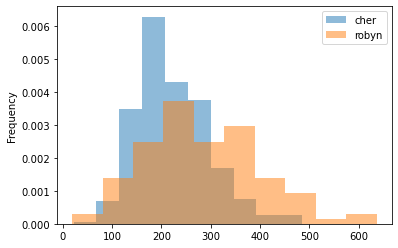

In [483]:
#concat the df's together
full_songs_df = pd.concat([cher_songs_df,robyn_songs_df], ignore_index=True)

#display the historgram
full_songs_df.groupby('artist')['word_count'].plot(kind="hist",density=True,alpha=0.5,legend=True)

Since the lyrics may be stored with carriage returns or tabs, it may be useful to have a function that can collapse whitespace, using regular expressions, and be used for splitting. 

Q: What does the regular expression `'\s+'` match on? 

A: 


In [482]:
collapse_whitespace = re.compile(r'\s+')

def tokenize_lyrics(lyric) : 
    """strip and split on whitespace"""
    return([item.lower() for item in collapse_whitespace.split(lyric)])

In [ ]:
# Your lyric length comparison chart here. 